In [1]:
#importamos librerias
import pandas as pd

In [2]:
df = pd.read_csv('../data/viajes_surfistas.csv')
df

,homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
0,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
1,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.022100,-118.481000
2,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.030400,-118.779000
3,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
4,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.888889,-118.405278
...,...,...,...,...,...,...,...,...,...
9506,"Bridgetown, Western Australia",Australia,Australia,-33.954448,116.131214,Australia,Australia,-34.225000,115.017000
9507,"Lille, France",Europe,France,50.629250,3.057256,Europe,France,45.002343,-1.201475
9508,MX,South America,Mexico,23.634501,-102.552784,South America,Mexico,21.016700,-101.250000
9509,Kuta - Bali - Indonesia,Asia,Indonesia,-8.739184,115.171130,Asia,Indonesia,-8.710093,115.166845


In [3]:
# Lo primero que haré será analizar cuantos paises unicos tengo
# Esto es parte de mi analisis exploratorio
df['homecountry'].unique()

array(['United States of America', 'France', 'Indonesia', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Germany', 'Brazil',
       'Ireland', 'Japan', 'Colombia', 'Morocco', 'Chile', 'Kuwait',
       'Uruguay', 'Italy', 'South Korea', 'Venezuela', 'India', 'Peru',
       'New Zealand', 'Mexico', 'Oman', 'Netherlands', 'Bangladesh',
       'Kenya', 'Thailand', 'Switzerland', 'Argentina', 'Lebanon',
       'Malaysia', 'Poland', 'Dominican Republic', 'Portugal', 'Jordan',
       'Canada', 'Singapore', 'Costa Rica', 'United Arab Emirates',
       'Uzbekistan', 'Qatar', 'Panama', 'Saint Barthelemy',
       'South Africa', 'Ukraine', 'Greece', 'Norway', 'Turkey',
       'French Polynesia', 'Slovenia', 'Guatemala', 'Taiwan', 'Nicaragua',
       'Ecuador', 'Hong Kong S.A.R.', 'El Salvador', 'Paraguay', 'Russia',
       'Namibia', 'Puerto Rico', 'Belgium', 'Nigeria', 'Jersey', 'Cuba',
       'China', 'Uganda', 'Belarus', 'Sri Lanka', 'Romania', 'Slovakia',
       'Sweden', 'Lux

In [4]:
#Cuentos cuantos tengo
len(df['homecountry'].unique())

101

In [13]:
# Cuantos surfistas hay por pais (agrupacion)
agrupado = df.groupby('homecountry').agg(
    {
       'homename':'count' 
    }
)
agrupado.sort_index(ascending=False)

,homename
homecountry,
Venezuela,34
Uzbekistan,1
Uruguay,21
United States of America,2826
United States Virgin Islands,2
...,...
Bahrain,2
Austria,3
Australia,809


In [16]:
agrupado_ordenado = agrupado.sort_values('homename', ascending=False)
agrupado_ordenado

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752
United Kingdom,496
...,...
Nepal,1
Oman,1
Pakistan,1


In [36]:
df_top4 = agrupado_ordenado.head(4)
df_top4

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752


In [37]:
# Puedo hacer esto con un .drop() por indices
df_otros = agrupado_ordenado.drop(index=df_top4.index.values)
df_otros

,homename
homecountry,
United Kingdom,496
France,433
Brazil,379
Portugal,367
Italy,295
...,...
Nepal,1
Oman,1
Pakistan,1


In [38]:
# Ahora yo necesito sumar todos estos registros
# Esto lo puedo hacer con una agrupacion. El problema es que no tengo ningun campo por el cual agruparlos
# Por eso, creo una columna donde todos los valores sean el mismo
df_otros['Pais'] = 'Otros'
df_otros

,homename,Pais
homecountry,,
United Kingdom,496,Otros
France,433,Otros
Brazil,379,Otros
Portugal,367,Otros
Italy,295,Otros
...,...,...
Nepal,1,Otros
Oman,1,Otros
Pakistan,1,Otros


In [39]:
# Ahora si, los puedo agrupar todos por esta columna nueva top4
df_otros_agrupado = df_otros.groupby('Pais').agg({
    'homename': 'sum'
})
df_otros_agrupado

,homename
Pais,
Otros,4231


In [40]:
# Pongo el indice como columna
df_otros_agrupado = df_otros_agrupado.reset_index()
df_otros_agrupado

,Pais,homename
0,Otros,4231


In [41]:
# Pongo el indice como columna en mi dataset de top 4
df_top4 = df_top4.reset_index()
df_top4

,homecountry,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [42]:
# Renombro las columnas para que ambos tengan el mismo nombre
df_top4.columns = ['pais', 'numero_surfista']
df_top4

,pais,numero_surfista
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [43]:
df_otros_agrupado.columns = ['pais', 'numero_surfista']
df_otros_agrupado

,pais,numero_surfista
0,Otros,4231


In [47]:
# Y ahora los uno en un mismo dataframe
df_final = pd.concat([df_top4, df_otros_agrupado])
df_final

,pais,numero_surfista
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752
0,Otros,4231


In [48]:
# Seteo el indice en la columna Pais ya que con esto puedo hacer un pie chart muy rapidamente con Pandas
df_final = df_final.set_index('pais')
df_final

,numero_surfista
pais,
United States of America,2826
Japan,893
Australia,809
Spain,752
Otros,4231


Text(0.5, 1.0, 'Porcentaje de Surfistas por País de Procedencia')

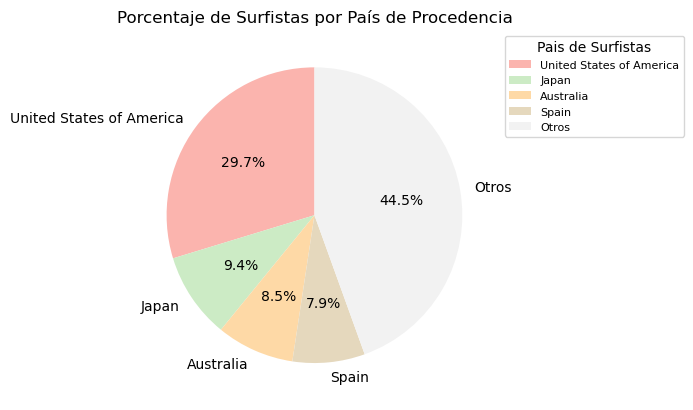

In [52]:
# Pie Chart con Pandas
ax = df_final.plot.pie( # Agarra el indice como etiquetas por defecto
    y='numero_surfista', 
    startangle=90,
    autopct='%1.1f%%',
    colormap='Pastel1' # Colores Pasteles. Muy agradable a la vista.
)

ax.set_ylabel('')
ax.legend(
    title='Pais de Surfistas',
    bbox_to_anchor=(1, 1),
    fontsize=8
)

ax.set_title('Porcentaje de Surfistas por País de Procedencia')